# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Проверим, есть ли в данных аномальные значения:

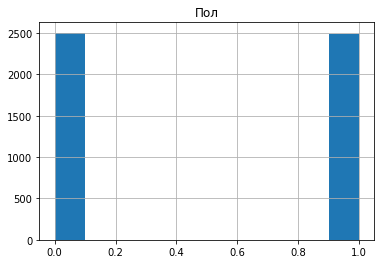

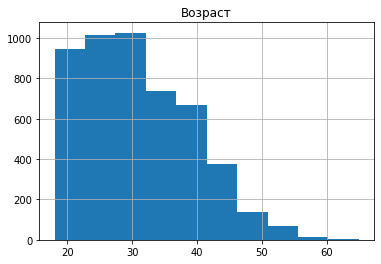

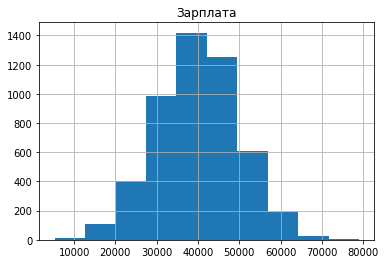

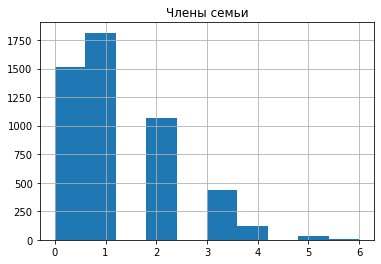

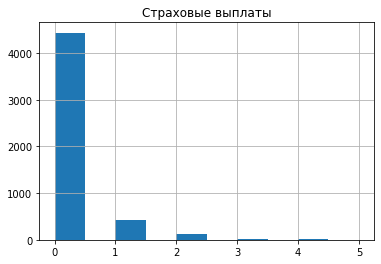

In [4]:
for col in df.columns:
    df.hist(column=col)

Изменим тип данных в столбцах `Возраст` и `Зарплата` на целочисленный. 

In [5]:
columns = ['Зарплата', 'Возраст']
df[columns] = df[columns].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                5000 non-null   int64
 1   Возраст            5000 non-null   int64
 2   Зарплата           5000 non-null   int64
 3   Члены семьи        5000 non-null   int64
 4   Страховые выплаты  5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


Данные загружены, аномалий нет.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос:** изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу?

**Ответ:** при умножении признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:** 

Пусть:

$a$ - предсказание

$w$ - веса линейной регрессии

$X$ - матрица признаков

$P$ - случайная обратимая матрица

Формула предсказаний:

$$a = Xw$$

Умножим исходную матрицу X на рандомную матрицу P, получим следующую формулу предсказаний:

$$a = XPw$$

Веса вычисляются по следующей формуле:

$$w = (X^TX)^{-1}X^Ty$$

Новая формула обучения будет выглядеть так:

$$w' = ((XP)^T(XP))^{-1}(XP)^Ty$$

Раскроем скобки:

$$w' = ((X^TP^TXP)^{-1}X^TP^Ty$$
$$w' = P^{-1}(X^TX)^{-1}EX^Ty$$
$$w' = P^{-1}w$$


## Алгоритм преобразования

**Алгоритм**

Для защиты персональных данных на этапе создания модели будем умножать матрицу признаков на обратимую матрицу, которая будет генерироваться случайным образом.

Этапы работы алгоритма:

1. Генерация случайной матрицы.
2. Проверка матрицы на обратимость.
3. Получение матрицы преобразованных признаков.
4. Применение алгоритма при обучении модели.

**Обоснование**

Описанный алгоритм может использоваться для шифрования данных без потери качества линейной регрессии, что было доказано на предыдущем шаге.

## Проверка алгоритма

Создадим случайную матрицу и проверим ее на обратимость:

In [6]:
matrix = np.random.normal(size=(4, 4))

In [7]:
np.linalg.inv(matrix)

array([[-0.81096389, -0.3829205 , -0.25039418,  0.18360346],
       [-0.10729569,  0.26679311, -0.09150695,  0.36900271],
       [ 0.4852872 ,  0.81470058,  0.69468654, -0.1969248 ],
       [-1.16126802, -0.78718989, -1.06651527, -0.01960086]])

Выделим целевой признак и создадим матрицу признаков:

In [8]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

In [9]:
features_matrix = np.array(features)
features_matrix.shape

(5000, 4)

Получим матрицу преобразованных признаков и создадим датафрейм:

In [10]:
features_transformed = features_matrix.dot(matrix)
features_transformed.shape

(5000, 4)

In [11]:
features_transformed = pd.DataFrame(features_transformed)
features_transformed.head()

,0,1,2,3
0,99998.057263,-52032.685116,2112.749472,-64143.366815
1,76601.555825,-39845.729765,1640.531236,-49127.067120
2,42329.366797,-22016.544586,912.611091,-27144.835365
3,84083.040844,-43759.829923,1755.744111,-53941.921832
4,52614.095906,-27373.082497,1121.418070,-33745.791414


Разделим исходный и преобразованный датафреймы на две выборки:

In [12]:
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)
features_train.shape, features_test.shape, target_train.shape, target_test.shape

((3750, 4), (1250, 4), (3750,), (1250,))

In [13]:
features_transformed_train, features_transformed_test = train_test_split(features_transformed, random_state=1)

features_transformed_train.shape, features_transformed_test.shape

((3750, 4), (1250, 4))

In [14]:
display(features_train.head(5))
display(features_transformed_train.head(5))

,Пол,Возраст,Зарплата,Члены семьи
3186,1,36,39400,4
632,0,30,26300,3
577,0,31,24600,2
2406,0,37,37100,3
4686,0,25,34800,1


,0,1,2,3
3186,79433.164617,-41323.079888,1678.791404,-50952.874754
632,53019.242573,-27575.970718,1129.615451,-34005.690246
577,49589.389711,-25791.213690,1062.001419,-31803.633683
2406,74794.623842,-38908.384969,1587.331248,-47974.046249
4686,70163.921557,-36510.982045,1477.107249,-45007.796433


Переходим к обучению моделей:

In [15]:
model_1 = LinearRegression()
model_2 = LinearRegression()

In [16]:
model_1.fit(features_train, target_train)
model_2.fit(features_transformed_train, target_train)

LinearRegression()

In [17]:
prediction1 = model_1.predict(features_test)
prediction2 = model_2.predict(features_transformed_test)

In [18]:
model_1_r2 = r2_score(target_test, prediction1)
model_2_r2 = r2_score(target_test, prediction2)
print(f'R2 на исходных данных: {model_1_r2:.4f}')
print(f'R2 на преобразованных данных: {model_2_r2:.4f}')

R2 на исходных данных: 0.3238
R2 на преобразованных данных: 0.3238


Качество работы модели на преобразованных данных действительно не изменилось. Для финальной проверки восстановим исходный датафрейм:

In [19]:
df_recovered = features_transformed.dot(np.linalg.inv(matrix))
df_recovered[4] = target

In [20]:
df_recovered = round(df_recovered).astype('int64')
df_recovered.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']
print('Восстановленный датафрейм:')
display(df_recovered.head(5))
print('Исходный датафрейм:')
display(df.head(5))
print('Проверка:')
display((df == df_recovered).apply(pd.Series.value_counts))

Восстановленный датафрейм:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


Исходный датафрейм:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


Проверка:


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
True,5000,5000,5000,5000,5000


**Вывод:** в ходе выполнения проекта доказали, что при умножении признаков на случайную обратимую матрицу качество линейной регрессии не меняется. На основе этого создали алгоритм преобразования для защиты персональных данных.